In [8]:
from mynotebooks import *
%matplotlib inline

#exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,1.5),obj_type="box",salientMode="minimum", name='human') # minimum
#learn = RobotLearning.LearningModel(exp)
#errMan = learn.errorManager

ferr,feval,fgoals = [],[],[]
folder = './data/biobj/salient/error/'
for fn in os.listdir(folder):
    if(fn.endswith('error.data')): ferr.append(folder + fn)
    if(fn.endswith('eval.data')): feval.append(folder + fn)
    if(fn.endswith('goals.data')): fgoals.append(folder + fn)
        
print ferr

['./data/biobj/salient/error/bimanual_error.data', './data/biobj/salient/error/s6-model6-error.data']


./data/biobj/salient/error/bimanual_error.data length: 2880
2780


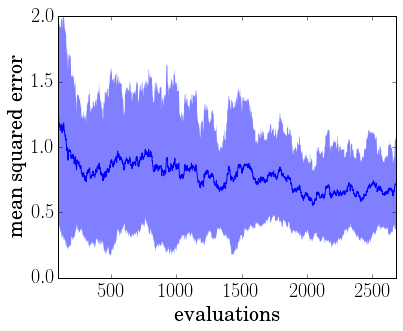

./data/biobj/salient/error/s6-model6-error.data length: 5740
5640


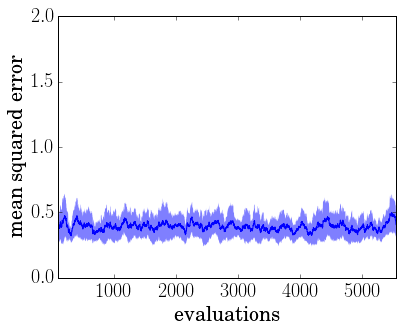

In [13]:
ylim = [2,2,1]
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

for i,f in enumerate(ferr):
    errlist = pickle.load(open(f, "rb"))
    
    col = 0
    if(i==0):  col = 0
    
    errlist = [e[col] for e in errlist]
    #error_var = [e[1] for e in errlist]
    #error_minmax = np.array([e[3] for e in errlist]) - np.array([e[2] for e in errlist])

    print f, "length:", len(errlist)

    
    error_mean, error_minmax = [],[]
    
    w = 100
    for j in range(len(errlist)-w):
        win = errlist[j:j+w]
        error_mean.append(np.mean(win))
        #error_minmax.append(np.max(win)/5-np.min(win)/5)
        error_minmax.append(np.var(win))
        
    print len(error_mean)
    #error_mean = np.convolve(error_mean, np.ones(w)/w)
    #error_var = np.convolve(error_var, np.ones(w)/w)
    #error_minmax = np.convolve(error_minmax, np.ones(w)/w)
        
    #plt.close()
    fig, ax = Box2DWorld.makeFigure(size=[6,5])
    #plt.gca().tight_layout()
    #plt.gcf().subplots_adjust(bottom=0.3)
    plt.axes(xlim=[w,len(error_mean)-w],ylim=[0,ylim[i]])
    VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,error_minmax,xlabel="evaluations",ylabel="mean squared error")
    #VectorFigUtils.drawPlotXY(range(len(error_mean)),error_mean,xlabel="trials",ylabel="mean error")
    #VectorFigUtils.drawPlotXY(range(len(error_mean)),error_var,xlabel="trials",ylabel="mean error")
    #ax.set_aspect('auto')
    fig.savefig('imgs/learnbi%d.png'%i, dpi=300, format='png')
    plt.show()

In [9]:
for i,f in enumerate(fgoals):
    goals = pickle.load(open(f, "rb"))
print len(goals)

5739


./data/biobj/salient/error/s6-model6-goals.data
[-0.2977631176157971, 0.072776159495546888, 0.75050201184403798, 0.25, 0.97999999999999998] [0.29416482589474502, -0.17314174259172216, 0.33032052683672547, 0.040000000000000001, 0.79000000000000004]


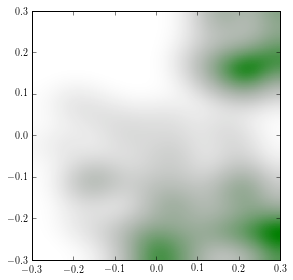

[-0.28883410997718861, -0.27433488580603754, 0.20522887185873712, -0.54000000000000004, 0.97999999999999998] [0.28192921025146134, -0.11788935832611411, -0.24720948147030924, -0.22, 0.59999999999999998]


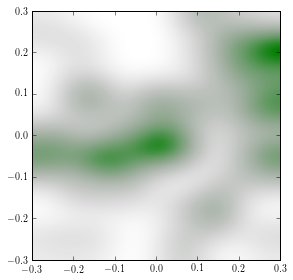

[-0.27998808831237154, 0.28321053571585397, 0.44435329395229006, -0.089999999999999997, 1.1200000000000001] [0.29543879421744357, 0.29324629318275358, 0.75547307124089613, 0.050000000000000003, 1.28]


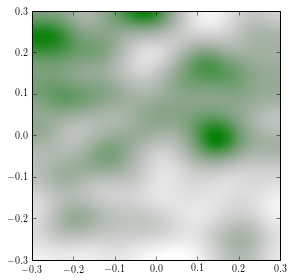

[-0.2975262138240567, -0.035756830186835536, 0.64454833208846696, -0.01, 0.71999999999999997] [0.29912786366590893, 0.10786796514408306, -0.33164872889465974, 0.23000000000000001, 1.01]


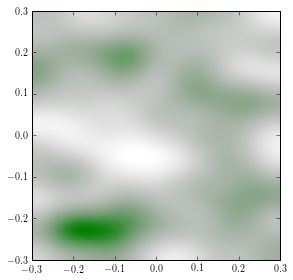

[-0.24965832498555443, -0.17757012618925755, -0.73737802932334728, -0.089999999999999997, 1.01] [0.29096373837198741, -0.11599313387705198, -0.013242829461811656, 0.45000000000000001, 1.0700000000000001]


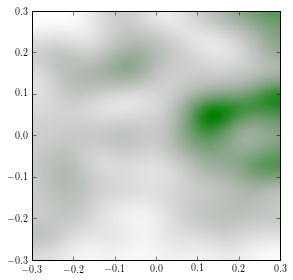

[-0.29504467045569932, 0.1972242994261843, 0.19919057302656806, 0.37, 1.2] [0.28928371219612403, -0.0057300219271598507, -0.14470783819282707, 0.23999999999999999, 0.79000000000000004]


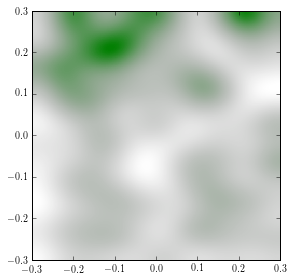

[-0.29860499293442172, 0.29397146388342621, -0.0011346444702203806, 0.050000000000000003, 1.0600000000000001] [0.29969709772092468, -0.021729516696904858, -0.33593804515420428, -0.17999999999999999, 1.03]


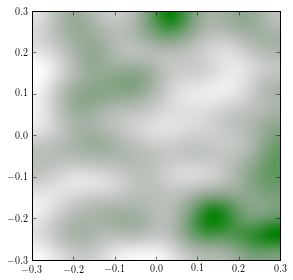

[-0.29078505681839889, -0.259316790718089, 0.21783124733017434, -0.14999999999999999, 0.69999999999999996] [0.29853854670689373, -0.11697249205907811, -0.68329510335270283, -0.0, 1.1599999999999999]


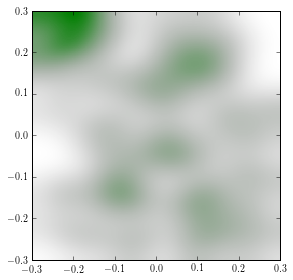

[-0.29197210445719901, -0.2787690278022158, 0.13568723795510129, -0.29999999999999999, 1.4099999999999999] [0.29901762467987725, 0.10037698232971382, -0.1836123051030748, -0.27000000000000002, 0.84999999999999998]


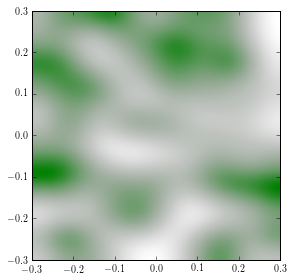

[-0.29326092584349805, -0.24377204952518131, 0.12652494518580609, -0.19, 1.1299999999999999] [0.29858915898132382, -0.27016463516289263, -0.69671648655806184, 0.10000000000000001, 0.84999999999999998]


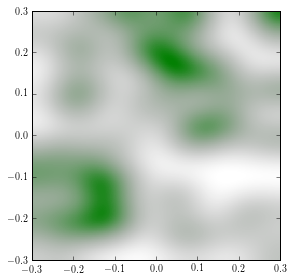

[-0.2895690523920762, 0.15789852779847036, -0.11200470934932619, -0.28999999999999998, 0.83999999999999997] [0.28935245319697661, -0.25996045489273911, -0.59046419114114301, 0.040000000000000001, 1.1299999999999999]


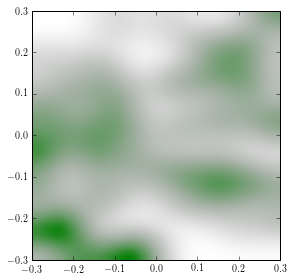

[-0.29779525770309634, -0.076458177824840726, -0.75985030980016943, 0.40999999999999998, 1.1200000000000001] [0.29922864288985884, 0.24385259813336535, 0.25822657954327055, -0.20999999999999999, 1.1899999999999999]


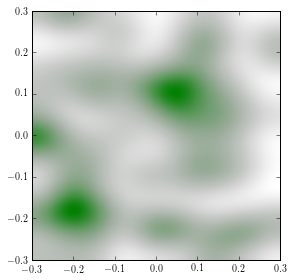

[-0.29253212811697588, 0.16728925991968907, -0.20482785574687667, 0.55000000000000004, 0.64000000000000001] [0.29289579637743113, 0.064210415899836504, -0.35456196380042282, 0.02, 1.1599999999999999]


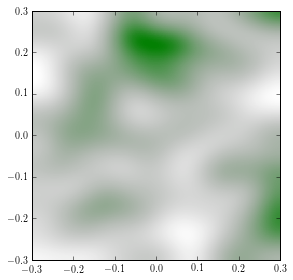

[-0.29462390912251507, -0.26025397854127785, -0.65376175969768668, -0.32000000000000001, 1.21] [0.29667731850327927, -0.29689927908930364, 0.4438219245720324, 0.059999999999999998, 1.01]


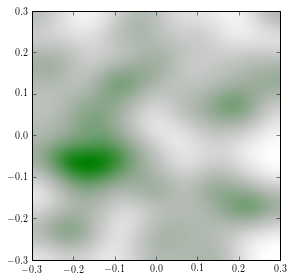

[-0.29208344020920635, 0.28855020780697627, -0.2225563268461139, 0.19, 1.3500000000000001] [0.29937942787101707, 0.054616964503417659, 0.44135857801672118, -0.32000000000000001, 0.88]


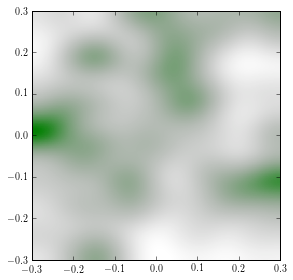

[-0.29739087248284901, -0.017197748411525021, 0.55926744903200076, -0.050000000000000003, 1.1799999999999999] [0.2959267096102014, -0.28353707829045172, 0.12112167305417981, -0.040000000000000001, 0.84999999999999998]


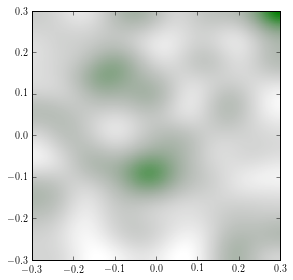

[-0.29507230715676136, 0.091171448260127436, 0.37483842344201401, 0.17000000000000001, 1.1899999999999999] [0.28880497751510015, 0.18528911865872916, -0.44207868437560172, 0.20999999999999999, 1.03]


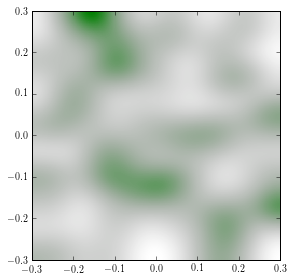

[-0.29853007485248639, -0.26557112696879115, -0.038001411958905301, -0.41999999999999998, 1.04] [0.2947428683850245, 0.19409878320067531, -0.72878441440270303, -0.02, 1.23]


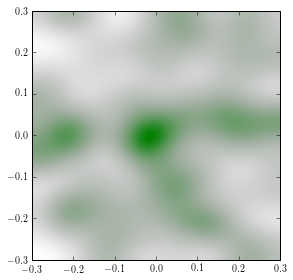

[-0.29757015940318537, 0.055673212056274152, 0.12847547702788154, -0.46000000000000002, 0.94999999999999996] [0.29834686446855163, 0.11282525468362314, 0.72060240932838537, -0.63, 1.03]


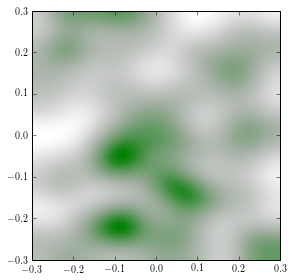

[-0.29979646220470585, 0.11428426740737539, 0.56052858837150621, -0.35999999999999999, 1.1100000000000001] [0.29451406537372871, -0.061948606125412559, 0.76098311153215403, -0.20000000000000001, 0.58999999999999997]


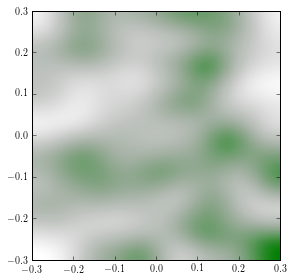

[-0.28336744590025709, 0.030596566751550119, -0.07698780961745641, -0.32000000000000001, 0.71999999999999997] [0.29892083657211205, -0.22637591072617325, 0.77920017916304229, -0.02, 0.76000000000000001]


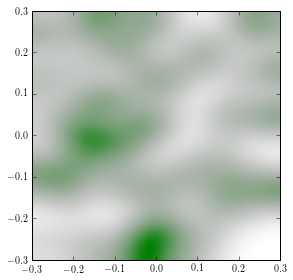

[-0.29735670754071752, 0.22482866477742133, -0.43347963594238575, -0.040000000000000001, 1.1399999999999999] [0.29758879022180762, -0.11189725685452945, 0.62046907200207613, 0.11, 1.3400000000000001]


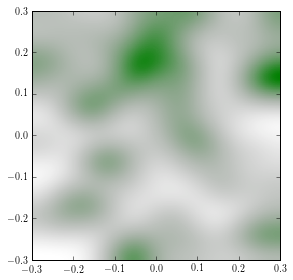

[-0.24402892516617489, 0.19917355342970186, -0.13307135943735179, -0.25, 1.0700000000000001] [0.28083844850914574, -0.1699125395227013, 0.63640400562269217, -0.17000000000000001, 0.60999999999999999]


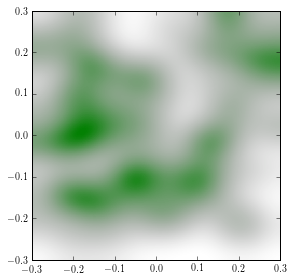

[-0.29309599066052622, -0.215885349826968, -0.14345465272054519, 0.31, 0.94999999999999996] [0.29938091092661478, 0.038371816149489202, -0.62679832239218181, 0.050000000000000003, 1.1200000000000001]


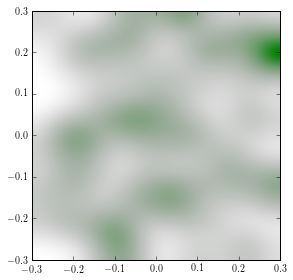

[-0.28803516481345709, 0.26695824849833022, -0.21811515441893531, -0.38, 1.2] [0.29895609483977592, 0.26504301379964762, 0.56268324324812768, -0.14000000000000001, 0.95999999999999996]


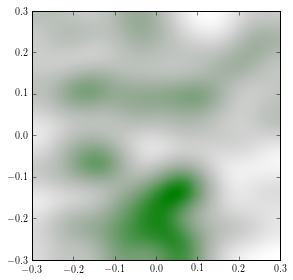

[-0.29643376376628133, 0.050595533416971511, -0.60498006507018121, -0.14000000000000001, 0.71999999999999997] [0.29747573048997222, -0.19973923199109883, -0.69455266607483379, 0.089999999999999997, 0.68999999999999995]


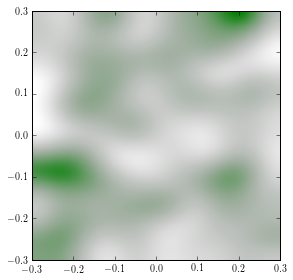

[-0.29881132087420931, 0.033958758593812727, 0.42482935894593465, -0.089999999999999997, 0.73999999999999999] [0.28774562417928273, -0.024470477652074857, 0.77690580354930916, -0.55000000000000004, 0.90000000000000002]


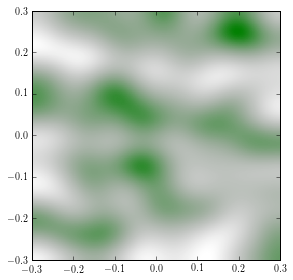

[-0.29944852454409687, -0.066513336664316358, -0.0058576080947357889, -0.20999999999999999, 0.91000000000000003] [0.29657706761812441, -0.096520970722623944, 0.74414433173253092, -0.080000000000000002, 0.81999999999999995]


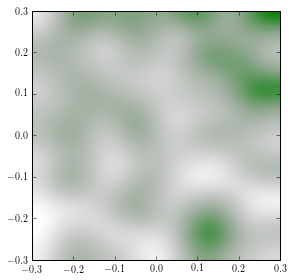

[-0.29501104211130991, -0.0052742607937523306, -0.66788277066498247, 0.34999999999999998, 1.1899999999999999] [0.2989848394599367, 0.22590256584043836, 0.73530455175499565, -0.19, 1.03]


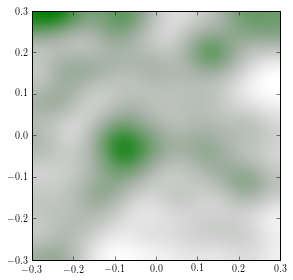

[-0.29491118184558818, -0.080843153130728901, -0.49525988870420484, -0.02, 1.1399999999999999] [0.29451244457699916, -0.25505820629995957, 0.2838919704661273, -0.44, 0.80000000000000004]


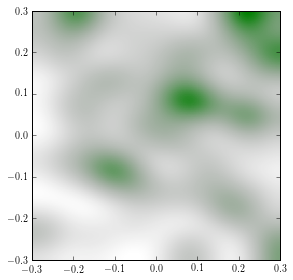

[-0.29839295115242487, 0.15219401445866881, 0.36062254980787634, -0.55000000000000004, 0.97999999999999998] [0.29663497618784329, 0.26233125476233754, -0.36769990102535444, 0.13, 1.1200000000000001]


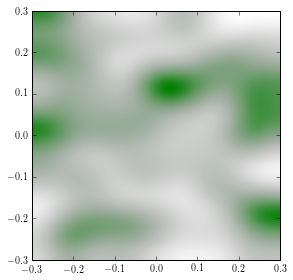

[-0.28629428688680081, 0.054296206356228532, 0.46359463653884037, -0.11, 0.90000000000000002] [0.2883999686663839, -0.20031232960836573, 0.50696557245308893, 0.050000000000000003, 0.76000000000000001]


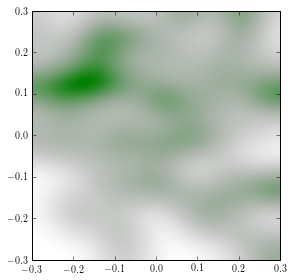

[-0.28975060586368645, 0.19405983146972522, 0.76537947969516718, 0.10000000000000001, 1.3200000000000001] [0.29890265006020345, -0.042181941429907659, -0.36890750523795679, 0.01, 1.1599999999999999]


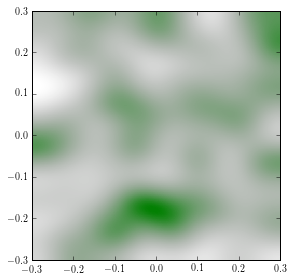

[-0.28291836784666502, 0.11527646468599487, -0.68094532604646296, -0.12, 1.1200000000000001] [0.29507482092122195, 0.21987561343505413, -0.33411468132672467, 0.25, 0.84999999999999998]


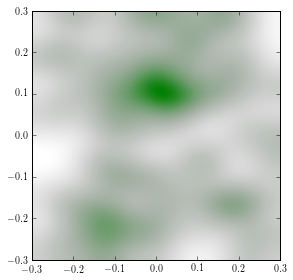

[-0.29008178687117897, 0.15787002490055585, 0.30370675833591526, 0.070000000000000007, 1.05] [0.28834170992051511, 0.067845384553543386, -0.44305079295153632, 0.050000000000000003, 1.0800000000000001]


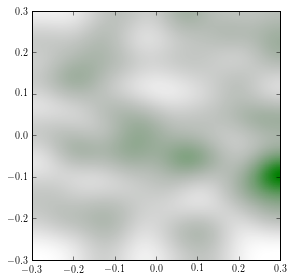

[-0.28846463059621408, 0.29673894900204678, -0.45703167891225543, 0.20999999999999999, 1.04] [0.29420718592819839, -0.17840753709120113, 0.66414271144868819, 0.22, 0.82999999999999996]


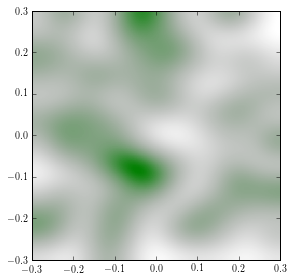

[-0.29969485309431165, 0.24454598658774687, 0.47164522997806102, -0.22, 1.1799999999999999] [0.29974996415620198, 0.096929885346254102, 0.41320189974831945, -0.13, 1.24]


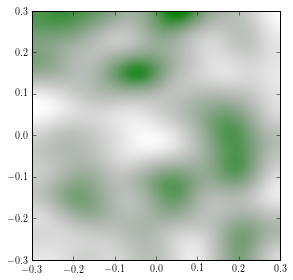

[-0.29800108077233722, 0.17295918614731881, 0.026100460942080073, 0.01, 1.1499999999999999] [0.29419770235399539, 0.044026430992425425, 0.49095718194351406, -0.040000000000000001, 1.1200000000000001]


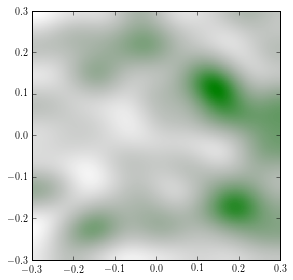

[-0.28842348013911162, 0.16400691808232754, -0.23577110500432352, -0.02, 1.2] [0.29689593284484228, 0.1065164501149144, 0.54705187270757794, 0.19, 1.0800000000000001]


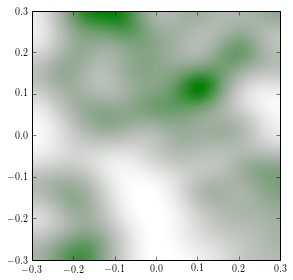

[-0.29746949712800297, -0.26318623778008793, 0.51886498511008594, -0.17999999999999999, 0.80000000000000004] [0.29714968860657676, 0.013957024569657861, -0.19192047412638666, -0.050000000000000003, 0.88]


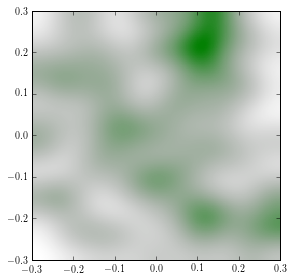

[-0.29967342817630932, 0.087673633559096464, 0.1573070208236943, -0.13, 1.0700000000000001] [0.29366169967907502, 0.21851422753540681, -0.012859944850298871, -0.34999999999999998, 0.90000000000000002]


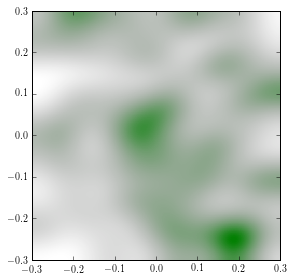

[-0.29941992669001971, -0.12720093878960659, 0.63150589315731509, -0.20999999999999999, 1.1299999999999999] [0.29690744687722143, 0.23474425153384829, 0.14448455315721226, -0.25, 1.24]


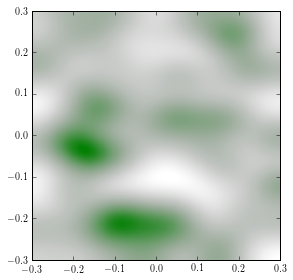

[-0.29805477151390858, 0.010152951492272994, -0.13440481540935731, -0.33000000000000002, 1.01] [0.29398253993984169, 0.13935724181929826, 0.25314993861413504, 0.47999999999999998, 1.0900000000000001]


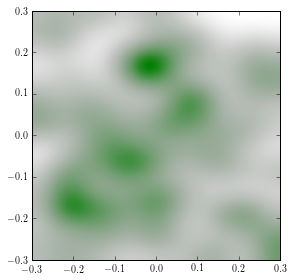

[-0.29413451279124586, -0.24685330416420687, 0.17309178612502968, -0.56000000000000005, 1.3200000000000001] [0.29858700896309875, -0.24871497982421209, -0.70091828083456031, -0.47999999999999998, 0.98999999999999999]


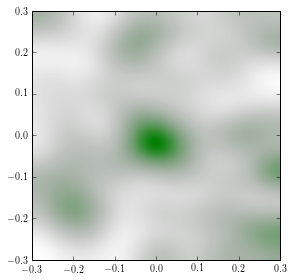

[-0.29935280507509976, 0.17470524000229065, -0.089668998616922346, -0.68000000000000005, 0.92000000000000004] [0.29420775261483589, 0.20220354842838079, -0.46922712823193768, 0.19, 0.84999999999999998]


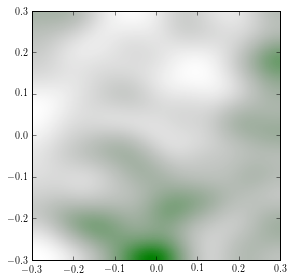

[-0.29852875663324191, -0.14975560363381846, 0.23500504978045705, -0.55000000000000004, 1.2] [0.29910207688882107, -0.083693086662376653, 0.12627547601033012, -0.070000000000000007, 1.03]


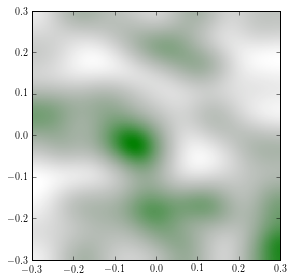

[-0.29420087246700627, 0.13524132247476148, 0.11332194773320536, -0.20999999999999999, 0.94999999999999996] [0.29535076766267587, -0.046767875796271507, -0.48267913655111538, -0.11, 0.75]


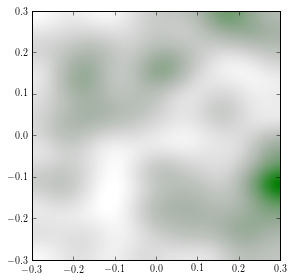

[-0.29534707390685538, 0.28136539670581229, 0.28889397853314475, -0.13, 1.29] [0.29770753000832678, 0.0988448458406401, -0.35347469788594055, 0.10000000000000001, 0.93999999999999995]


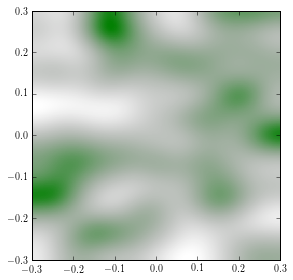

[-0.29457204440699186, 0.28390225240615574, 0.49838737127173027, -0.46999999999999997, 1.01] [0.29760819737602084, -0.22241832280190565, 0.19371766236098631, -0.35999999999999999, 0.62]


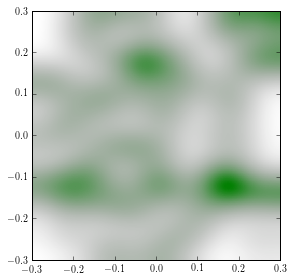

[-0.29634080794228651, 0.12116931833335452, 0.7734259521874769, -0.41999999999999998, 1.1200000000000001] [0.2987390746194355, -0.10760522764719138, 0.39432034668860338, -0.11, 0.77000000000000002]


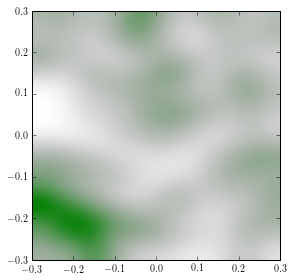

[-0.27851330649108691, 0.0036319070981307711, 0.21036882625223452, -0.02, 1.05] [0.29950767526754235, -0.23921068549660796, -0.1475971720701903, -0.050000000000000003, 0.68999999999999995]


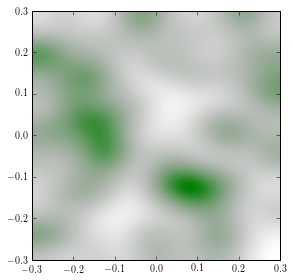

[-0.29375623530223832, -0.16964450296871114, 0.035708971662884781, -0.55000000000000004, 1.2] [0.29691148745096496, 0.22277044276142138, -0.52112305340041098, 0.33000000000000002, 1.1599999999999999]


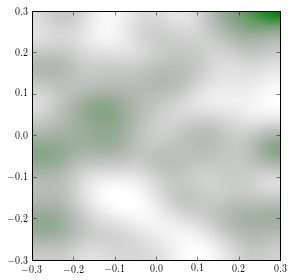

[-0.28887658412192924, -0.28643137890979947, -0.14088874430385517, -0.81000000000000005, 1.02] [0.29660944143272427, 0.19877030376444937, 0.71837740512069415, 0.34999999999999998, 1.1100000000000001]


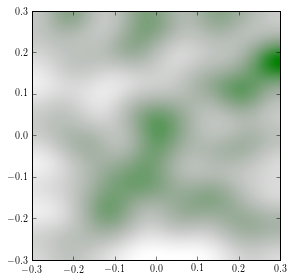

[-0.29834954023051996, -0.2607735879955202, -0.67069815184305448, 0.44, 0.67000000000000004] [0.29631206067170313, -0.18913215019870289, 0.0072249797494514656, 0.070000000000000007, 0.69999999999999996]


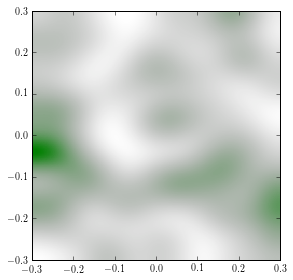

[-0.29885181425650914, -0.060144537450197794, -0.55859482111238656, -0.14000000000000001, 0.93000000000000005] [0.29820247553211876, -0.091473295151940054, -0.26633731124161797, -0.23000000000000001, 1.0]


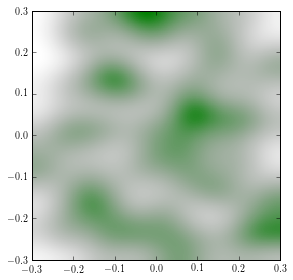

[-0.2995558669871487, -0.16861196026190672, -0.68161471273762964, -0.10000000000000001, 1.3700000000000001] [0.29833919818610166, -0.2837575382158371, 0.060974384540828874, -0.23000000000000001, 0.71999999999999997]


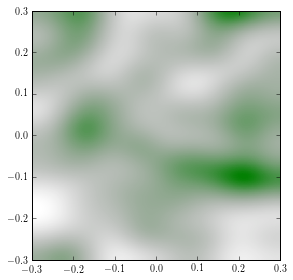

[-0.29321136305599776, 0.10911627778210585, 0.1289907704188395, -0.17000000000000001, 0.98999999999999999] [0.29244809552381068, 0.011743517916460083, 0.010100564319604599, -0.080000000000000002, 1.1100000000000001]


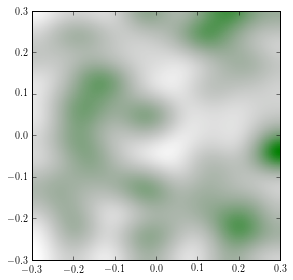

In [10]:
from scipy.ndimage.filters import gaussian_filter

if(len(goals) > 1):
    print f
    n = 100
    for iframes in range(len(goals)/n):
        x = 0.3
        mat = SensoriMotor.Matrix(xlim=[-x,x],ylim=[-x,x])
        win = goals[iframes*n:iframes*n+n]
        k = len(goals[0])
        ming,maxg = [99]*k,[-99]*k
        for j,g in enumerate(win):
            mat.add(g[0],g[1])
            ming,maxg = min(ming,list(g)),max(maxg,list(g))
        print ming,maxg
        plt.close()
        m = gaussian_filter(mat.m, sigma=40)

        fig, ax = Box2DWorld.makeFigure(axes=[-x,x,-x,x])
        VectorFigUtils.drawMaps(ax,m,extent=[-x,x,-x,x],alpha1=1)
        plt.show()